# Lab1_Task1

The following factorial (Example 6-2 in the text) was used to investigate the effects of four factors on the filtration rate of a resin for a chemical process plant. The factors are A = temperature, B = pressure, C = mole ratio (concentration of chemical formaldehyde), D = stirring rate. This experiment was performed in a pilot plant.

The parameter ranges are:

A: 20-40 C

B: 1-1.2 bar

C: 0.3-0.6 %

D: 1000-1300 rpm

In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
inputs_labels = {'A' : 'temperature',
                 'B' : 'pressure',
                 'C' : 'mol ratio',
                 'D' : 'stirring rate'}

dat = [('A',20,40),
       ('B',1,1.2),
       ('C',0.3,0.6),
       ('D',1000,1300)]

inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,20.0,40.0,temperature
B,1.0,1.2,pressure
C,0.3,0.6,mol ratio
D,1000.0,1300.0,stirring rate


In [3]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,20.0,40.0,temperature,-1.0,1.0
B,1.0,1.2,pressure,-1.0,1.0
C,0.3,0.6,mol ratio,-1.0,1.0
D,1000.0,1300.0,stirring rate,-1.0,1.0


In [4]:
import itertools
# we have four repetitions
encoded_inputs= list(itertools.product([-1,1],[-1,1],[-1,1], [-1,1]) )
encoded_inputs

results=pd.DataFrame(encoded_inputs,columns=['A','B','C','D'])
#results['Rate_bar']= results.iloc[:, 3:7].mean(axis=1)

results =results[results.columns[::-1]]
results.columns = ['A','B','C','D']

results

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [5]:
file_name = 'Ex6-2.csv'
data = pd.read_csv(file_name)
data

,StdOrder,RunOrder,CenterPt,Blocks,A,B,C,D,Rate
0,1,1,1,1,-1,-1,-1,-1,45
1,2,2,1,1,1,-1,-1,-1,71
2,3,3,1,1,-1,1,-1,-1,48
3,4,4,1,1,1,1,-1,-1,65
4,5,5,1,1,-1,-1,1,-1,68
5,6,6,1,1,1,-1,1,-1,60
6,7,7,1,1,-1,1,1,-1,80
7,8,8,1,1,1,1,1,-1,65
8,9,9,1,1,-1,-1,-1,1,43
9,10,10,1,1,1,-1,-1,1,100


In [6]:
repetitions=4
Rate= data['Rate']

In [7]:
results['Rate'] = Rate
results

,A,B,C,D,Rate
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


In [8]:
real_experiment = results

var_labels = []
for var in ['A','B','C','D']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else inputs_df.loc[var]['high'] , 
        axis=1)

print("The values of each real variable in the experiment:")
real_experiment[var_labels]

The values of each real variable in the experiment:


,temperature,pressure,mol ratio,stirring rate
0,20.0,1.0,0.3,1000.0
1,40.0,1.0,0.3,1000.0
2,20.0,1.2,0.3,1000.0
3,40.0,1.2,0.3,1000.0
4,20.0,1.0,0.6,1000.0
5,40.0,1.0,0.6,1000.0
6,20.0,1.2,0.6,1000.0
7,40.0,1.2,0.6,1000.0
8,20.0,1.0,0.3,1300.0
9,40.0,1.0,0.3,1300.0


In [9]:
labels = ['A','B','C','D']

main_effects = {}
rep=4
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = results.groupby(key)['Rate'].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])
        
print('Main effects')    
print(main_effects)

average_main_effects = {}

print('Average main effects')
for key in labels:
        average_effects = results.groupby(key)['Rate'].mean()
        average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(average_main_effects)

Main effects
{(0, 'A'): 21.625, (0, 'B'): 3.125, (0, 'C'): 9.875, (0, 'D'): 14.625, (1, 'A'): 21.625, (1, 'B'): 3.125, (1, 'C'): 9.875, (1, 'D'): 14.625, (2, 'A'): 21.625, (2, 'B'): 3.125, (2, 'C'): 9.875, (2, 'D'): 14.625, (3, 'A'): 21.625, (3, 'B'): 3.125, (3, 'C'): 9.875, (3, 'D'): 14.625}
Average main effects
{'A': 21.625, 'B': 3.125, 'C': 9.875, 'D': 14.625}


In [10]:
import itertools

twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:
    
    effects = results.groupby([key[0],key[1]])['Rate'].mean()
    
    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])

    # This somewhat hairy one-liner takes the mean of a set of sum-differences
    #twoway_effects[key] = mean([  sum([ i*effects[i][j] for i in [-1,1] ]) for j in [-1,1]  ])

twoway_effects

{('A', 'B'): 0.125,
 ('A', 'C'): -18.125,
 ('A', 'D'): 16.625,
 ('B', 'C'): 2.375,
 ('B', 'D'): -0.375,
 ('C', 'D'): -1.125}

### Determine threeway effect

In [11]:
import itertools

threeway_labels = list(itertools.combinations(labels, 3))

threeway_effects = {}
for key in threeway_labels:
    
    effects = results.groupby([key[0],key[1],key[2]])['Rate'].mean()
    
    threeway_effects[key] = sum([ i*j*k*effects[i][j][k]/4 for i in [-1,1] for j in [-1,1] for k in [-1,1] ])

threeway_effects

{('A', 'B', 'C'): 1.875,
 ('A', 'B', 'D'): 4.125,
 ('A', 'C', 'D'): -1.625,
 ('B', 'C', 'D'): -2.625}

### Determine fourway effect

In [12]:
# check division of fourway effects

import itertools

fourway_labels = list(itertools.combinations(labels, 4))

fourway_effects = {}
for key in fourway_labels:
    
    effects = results.groupby([key[0],key[1],key[2],key[3]])['Rate'].mean()
    
    fourway_effects[key] = sum([ i*j*k*l*effects[i][j][k][l]/8 for i in [-1,1] for j in [-1,1] for k in [-1,1] for l in [-1,1] ])

fourway_effects

{('A', 'B', 'C', 'D'): 1.375}

In [13]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects.append(abs(threeway_effects[k]))
    indexes.append(k)
for i,k in enumerate(fourway_effects.keys()):
    effects.append(abs(fourway_effects[k]))
    indexes.append(k) 
    
effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
A,21.625,21.71
"(A, C)",18.125,39.90
"(A, D)",16.625,56.59
D,14.625,71.27
C,9.875,81.18
"(A, B, D)",4.125,85.32
B,3.125,88.46
"(B, C, D)",2.625,91.09
"(B, C)",2.375,93.48
"(A, B, C)",1.875,95.36


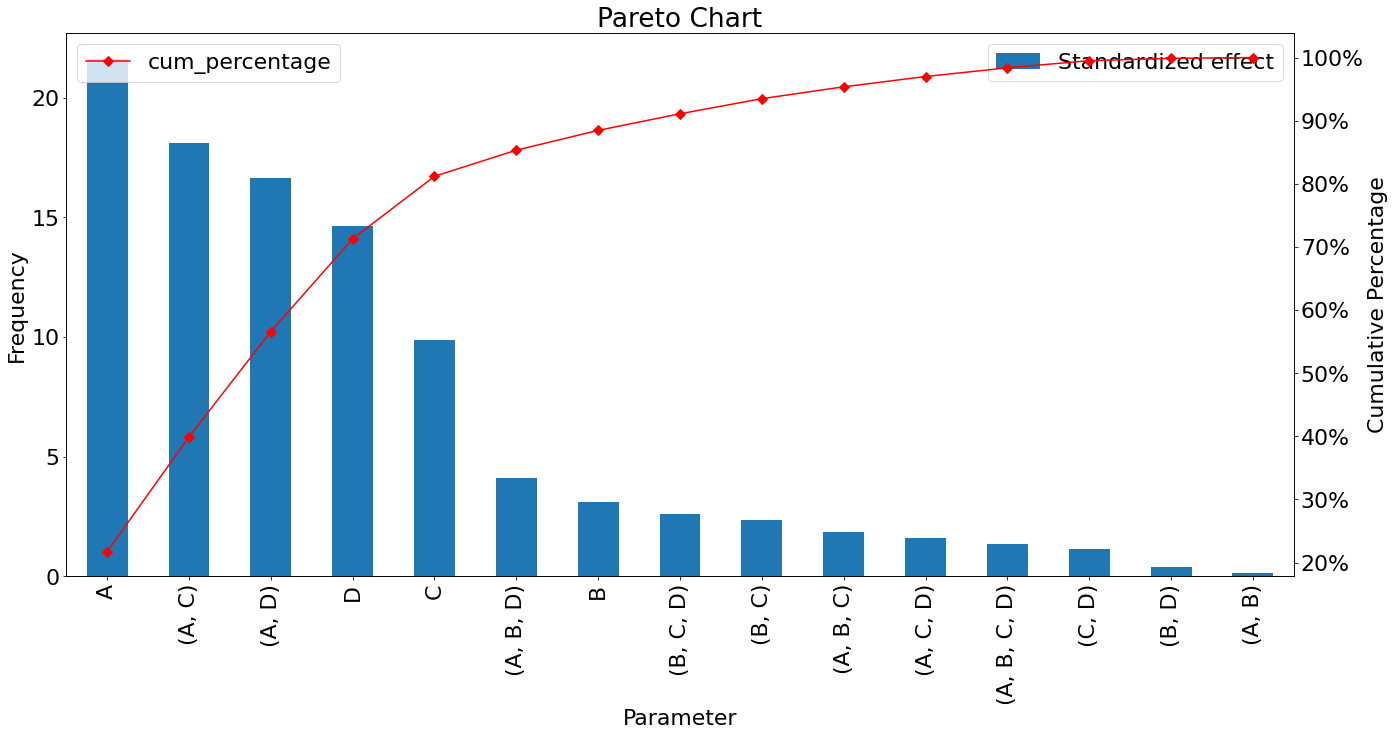

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({'font.size': 22})
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.set_title("Pareto Chart")
ax.set_xlabel("Parameter")
ax.set_ylabel("Frequency");
effects_df.plot.bar(y='Standardized effect', ax=ax)
# ax.axhline(2.06, color="orange", linestyle="dashed")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
#ax2.plot(effects_df.index, effects_df["cum_percentage"], color="red", marker="D", ms=7)
effects_df.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

### Optimize model by taking out parameter B, since this has the lowest effect on our model.

In [30]:
Rate = results['Rate']
xlabs=['A','C','D']
x = results[xlabs]
x = sm.add_constant(x) #statistics modelling package

res1 = smf.ols(formula='Rate ~ A + C + A:C + A + D + A:D', data=results).fit() #ordinary square

res1.summary()

C:\Users\wesva399\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     56.74
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.14e-07
Time:                        16:01:14   Log-Likelihood:                -42.711
No. Observations:                  16   AIC:                             97.42
Df Residuals:                      10   BIC:                             102.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0625      1.104     63.444      0.000      67.602      72.523
A             10.8125      1.104      9.791      0.000       8.352      13.273
C              4.9375      1.104      4.471      0.001       2.477       7.398
A:C           -9.0625      1.104     -8.206      0.000     -11.523      -6.602
D              7.3125      1.104      6.622      0.000       4.852       9.773
A:D            8.3125      1.104      7.527      0.000       5.852      10.773
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.738
Skew:                          -0.350   Prob(JB):                        0.691
Kurtosis:                       2.215   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append((average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append((twoway_effects[k]))
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects.append((threeway_effects[k]))
    indexes.append(k)
for i,k in enumerate(fourway_effects.keys()):
    effects.append((fourway_effects[k]))
    indexes.append(k) 
    
effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
A,21.625,41.69
"(A, D)",16.625,73.73
D,14.625,101.93
C,9.875,120.96
"(A, B, D)",4.125,128.92
B,3.125,134.94
"(B, C)",2.375,139.52
"(A, B, C)",1.875,143.13
"(A, B, C, D)",1.375,145.78
"(A, B)",0.125,146.02


(array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
        -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
         0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
 array([-18.125,  -2.625,  -1.625,  -1.125,  -0.375,   0.125,   1.375,
          1.875,   2.375,   3.125,   4.125,   9.875,  14.625,  16.625,
         21.625]))

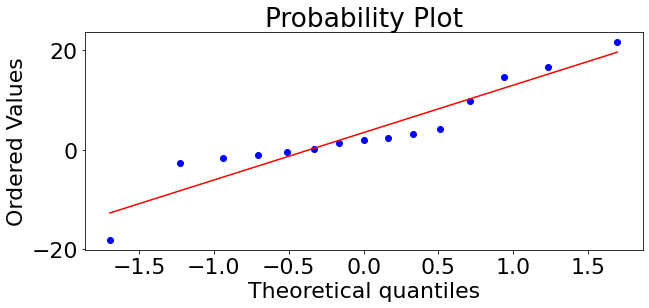

In [28]:
from matplotlib.pyplot import *
import scipy.stats as stats
fig = figure(figsize=(10,4))


stats.probplot(effects_df["Standardized effect"], dist="norm", plot=plt, fit=False) # for some reason fit = False is not working.


#plot standard deviation

#do a regression --> reduce number of trials

In [16]:
s = "y_hat = "

s += "%0.3f "%(results['Rate'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

for i,k in enumerate(threeway_effects.keys()):
    if(threeway_effects[k]<0):
        s += " %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1],k[2])
    else:
        s += "+ %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1],k[2])

for i,k in enumerate(fourway_effects.keys()):
    if(fourway_effects[k]<0):
        s += " %0.3f %s %s %s %s"%( fourway_effects[k]/2.0, k[0],k[1],k[2],k[3])
    else:
        s += "+ %0.3f %s %s %s %s"%( fourway_effects[k]/2.0, k[0],k[1],k[2],k[3])

print(s)

y_hat = 70.062 + 10.812 A + 1.562 B + 4.938 C + 7.312 D + 0.062 A B -9.062 A C+ 8.312 A D+ 1.188 B C -0.188 B D -0.562 C D+ 0.938 A B C+ 2.062 A B D -0.812 A C D -1.312 B C D+ 0.688 A B C D


In [17]:
sigmasquared = 0.0050
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000313
Variance in effects: 0.001250


In [18]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000078
Variance in effects: 0.000313


In [19]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.008838834764831844
0.017677669529663688


In [20]:
unc_a_0 = np.sqrt(Vmean)
print(unc_a_0)

0.008838834764831844
